## Telecom Churn Case Study
The Objective of the case study is to
i)  Analyse customer-level data of a leading telecom firm, 
ii) Build predictive models to identify customers at high risk of churn 
iii)Identify the main indicators of churn.

##### The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.
Churn Phases
In ‘good’ phase the customer is happy with the service and behaves as usual - 6th and 7th Month
In ‘action’ phase The customer experience starts to sore in this phase - 8th Month
In ‘churn’ phase the customer is said to have churned - 9th Month

## Step 1 : Reading and Pre-processing the data

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file and storing it into 'df_all' object.
df_all = pd.read_csv('telecom_churn_data.csv', encoding = "ISO-8859-1", low_memory=False)
df_all.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# Let's understand the type of columns
print('Dataframe Shape', df_all.shape)

Dataframe Shape (99999, 226)


In [4]:
df_all.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
#Dropping rows with all column values as Null
df_all.dropna(how='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [6]:
# Adding up the missing values (column-wise)
df_all.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [7]:
# Checking the percentage of missing values
round(100*(df_all.isnull().sum()/len(df_all.index)), 2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

### Filtering High value customers

##### High Value Customers are defined as Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months

In [8]:
tot_rech_cols = [col for col in df_all.columns if 'total_rech_' in col]
print(tot_rech_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [9]:
#data usage amount in the first three months
df_all['data_amnt_6']=df_all['av_rech_amt_data_6']*df_all['total_rech_data_6']
df_all['data_amnt_7']=df_all['av_rech_amt_data_7']*df_all['total_rech_data_7']
df_all['data_amnt_8']=df_all['av_rech_amt_data_8']*df_all['total_rech_data_8']
df_all['data_amnt_9']=df_all['av_rech_amt_data_9']*df_all['total_rech_data_9']

# Drop total_rech_data_* and av_rech_amt_data_*
drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
df_all.drop(drop_col, axis=1, inplace=True)

##### The percentage of missing values is same in both total_rech_data and av_rech_amt_data. Imputing the missing values with '0'

In [10]:
#total usage amount(calls+data) for first three months
df_all['tot_amnt_6']=df_all['total_rech_amt_6'].fillna(0)+df_all['data_amnt_6'].fillna(0)
df_all['tot_amnt_7']=df_all['total_rech_amt_7'].fillna(0)+df_all['data_amnt_7'].fillna(0)
df_all['tot_amnt_8']=df_all['total_rech_amt_8'].fillna(0)+df_all['data_amnt_8'].fillna(0)

##### Since we are considering only 'Good' phase, only months 6 and 7 are used. 

In [11]:
#average recharge amount for good phase
df_all['avg_amnt_good']=(df_all['tot_amnt_6']+df_all['tot_amnt_7'])/2

#70th percentile of the average amount
avg_amnt_70thperc=df_all['avg_amnt_good'].quantile(0.7)
print('70 percentile of 6th and 7th months avg recharge amount: ', avg_amnt_70thperc)

#Create a flag for high value customers
#Definition: customers who has recharged on an average for more than or equalto X where X is the 70th percentile of the average amount recharged in first two months
df_all['high_value']=np.where(df_all['avg_amnt_good']>=df_all['avg_amnt_good'].quantile(0.7), 1, 0)

#Filter for high value customers as customer retention is the main objective here
df=df_all[(df_all.high_value == 1)]
print('Dataframe Shape after Filtering High Value Customers: ', df.shape)

70 percentile of 6th and 7th months avg recharge amount:  478.0
Dataframe Shape after Filtering High Value Customers:  (30001, 227)


In [12]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  30001
Columns  :  227

Features : 
 ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og

### Data Cleaning

In [13]:
#List of columns with only 1 unqiue value
col_list = df.loc[:,df.apply(pd.Series.nunique) == 1]
col_list.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,high_value
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,1
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [14]:
#Remove Columns with only 1 unique value
df = df.loc[:,df.apply(pd.Series.nunique) != 1]
df.shape

(30001, 210)

In [15]:
#Update column names for consistency
#Update jun,jul,aug,sep to 6,7,8,9

df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [16]:
#Update datatypes of the columns
#Check for Columns that can be changed to integers, floats or other types
object_col_data = df.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [17]:
# convert to datetime
for col in object_col_data.columns:
    df[col] = pd.to_datetime(df[col])

df.shape

(30001, 210)

In [18]:
# Checking the percentage of missing values
round(100*(df_all.isnull().sum()/len(df_all.index)), 2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
sachet_2g_6              0.00
sachet_2g_7              0.00
sachet_2g_

In [19]:
#Drop Columns with > 30% of missing values and not for 9th Month(need to calculate churn flag)
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

drop_col = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & (missing_value_df["percent_missing"] > 30.0)]["column_name"]
drop_col

date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6                    night_pck_

In [20]:
#dropping the columns with more than 30% missing values 
df.drop(drop_col, axis=1, inplace=True)
df.shape

(30001, 183)

In [21]:
#Dropping columns with high correlation
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
print ("Correlated columns are: " ,cor[(cor > 0.60) | (cor < -0.60)].sort_values())

Correlated columns are:  monthly_3g_6        vol_3g_mb_6         0.601308
total_ic_mou_7      loc_ic_t2t_mou_7    0.601684
arpu_2g_9           count_rech_3g_9     0.602386
total_og_mou_8      onnet_mou_9         0.603450
total_rech_amt_8    arpu_6              0.603673
roam_og_mou_8       roam_og_mou_7       0.604862
offnet_mou_8        offnet_mou_6        0.604877
total_ic_mou_8      loc_ic_t2t_mou_8    0.605243
std_ic_mou_6        std_ic_t2m_mou_7    0.606225
std_og_mou_9        std_og_t2m_mou_8    0.606539
arpu_2g_9           vol_3g_mb_8         0.606779
std_ic_mou_7        std_ic_t2m_mou_8    0.606866
loc_og_mou_6        loc_og_t2t_mou_7    0.607059
vbc_3g_8            vol_3g_mb_8         0.607689
std_og_mou_8        std_og_t2m_mou_9    0.608170
std_og_mou_9        offnet_mou_9        0.608690
total_rech_amt_8    total_rech_amt_6    0.609306
total_og_mou_6      std_og_t2t_mou_6    0.610417
total_rech_amt_6    arpu_8              0.610687
std_og_mou_7        std_og_t2t_mou_8    0.61

In [22]:
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
df.drop(drop_col_list, axis=1, inplace=True)
print ("\nLatest dataframe's shape is: " ,df.shape)


Latest dataframe's shape is:  (30001, 128)


#### Checking Churn

In [23]:
#create churn flag based on the Incoming, outgoing and data usage in the last month(churn phase)
df['churn_actual']=np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0) , 1, 0)

In [24]:
### Checking the Churn Rate of high value customers
actual_churn = (sum(df['churn_actual'])/len(df['churn_actual'].index))*100
actual_churn

8.136395453484884

In [25]:
#Remove all columns related to last month(churn phase) as the churn flag is created
df = df[df.columns.drop(list(df.filter(regex='_9')))]
df.shape

(30001, 91)

In [26]:
df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,tot_amnt_6,tot_amnt_7,tot_amnt_8,avg_amnt_good,churn_actual
count,3.000100e+04,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,265.618262,272.700470,243.646938,380.608111,384.994337,348.723294,...,0.202393,1209.368754,169.138860,178.872765,158.523962,1116.509509,1188.731748,1047.618398,1152.620628,0.081364
std,6.908784e+05,460.640461,479.776947,501.961981,462.493645,482.972367,465.200856,484.257474,500.807874,486.918550,...,1.100107,957.677989,420.974354,443.544138,416.734860,1566.112291,1632.174907,1804.608844,1358.713982,0.273398
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000,0.000000
25%,7.000609e+09,309.865000,309.826000,231.473000,19.240000,18.155000,14.255000,78.575000,76.040000,58.670000,...,0.000000,460.000000,0.000000,0.000000,0.000000,546.000000,550.000000,396.000000,603.000000,0.000000
50%,7.001203e+09,481.694000,480.943000,427.585000,88.060000,86.885000,72.930000,229.635000,227.120000,197.590000,...,0.000000,846.000000,0.000000,0.000000,0.000000,788.000000,812.000000,688.000000,800.000000,0.000000
75%,7.001804e+09,699.943000,698.315000,661.491000,297.415000,298.087500,255.025000,494.780000,500.365000,455.385000,...,0.000000,1756.000000,128.800000,137.290000,98.440000,1210.000000,1267.000000,1152.000000,1208.000000,0.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,113458.000000,56075.000000,95884.500000,61236.000000,1.000000


# Exploratory Data Analysis

Churn plot

In [27]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,tot_amnt_6,tot_amnt_7,tot_amnt_8,avg_amnt_good,churn_actual
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,0,968,30.40,0.00,101.20,614.0,504.0,504.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,802,57.74,19.38,18.74,1580.0,790.0,3638.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,315,21.03,910.65,122.16,437.0,955.0,327.0,696.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,720,0.00,0.00,0.00,600.0,680.0,718.0,640.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,1,604,40.45,51.86,0.00,0.0,1166.0,979.0,583.0,0


Text(0.5,1,'Churn Distribution')

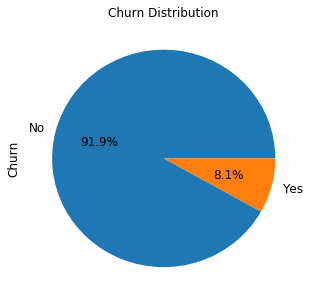

In [28]:
#Churn Distribution
ax = (df['churn_actual'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

In [29]:
# Distribution graphs (histogram/bar graph) of column data
def columnDistributionPlot(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
# Correlation matrix
def correlationMatrixPlot(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print('No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Scatter and density plots
def scatterMatrixPlot(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

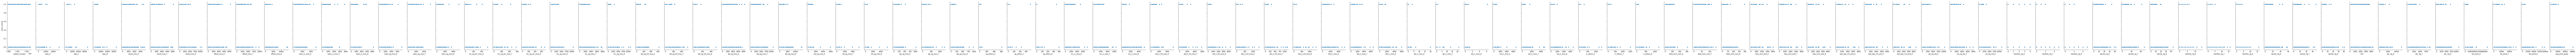

In [30]:
#Pair plot of all the columns with respect to churn
sns.pairplot(df, x_vars=df.drop('churn_actual', axis=1).columns, y_vars='churn_actual', size=5, aspect=0.5,kind='scatter')

##### Deriving new features

-Create features combining 6,7 month values which is nothing but good phase

In [31]:
col_list = df.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (df.shape)

for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df[avg_col_name] = (df[col_6]  + df[col_7])/ 2

(30001, 91)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_mou
std_ic_t2t_mou
std_ic_t2f_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
max_rech_amt
last_day_rch_amt
vol_2g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
tot_amnt


In [32]:
print (df.shape)

col_list = df.filter(regex='_6|_7').columns

df.drop(col_list, axis=1, inplace=True)
df.shape

(30001, 120)


(30001, 62)

In [33]:
#Conevrt AON in Months
df['aon_mon'] = df['aon']/30
df.drop('aon', axis=1, inplace=True)
df['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

Text(0.5,1,'Customers by their tenure')

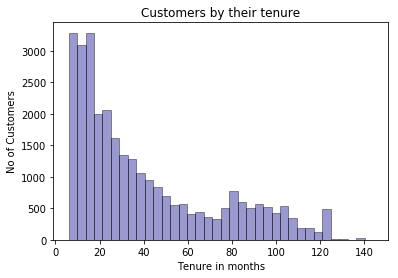

In [34]:
ax = sns.distplot(df['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Customers by their tenure')

In [35]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df['tenure_range'] = pd.cut(df['aon_mon'], tn_range, labels=tn_label)
df['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

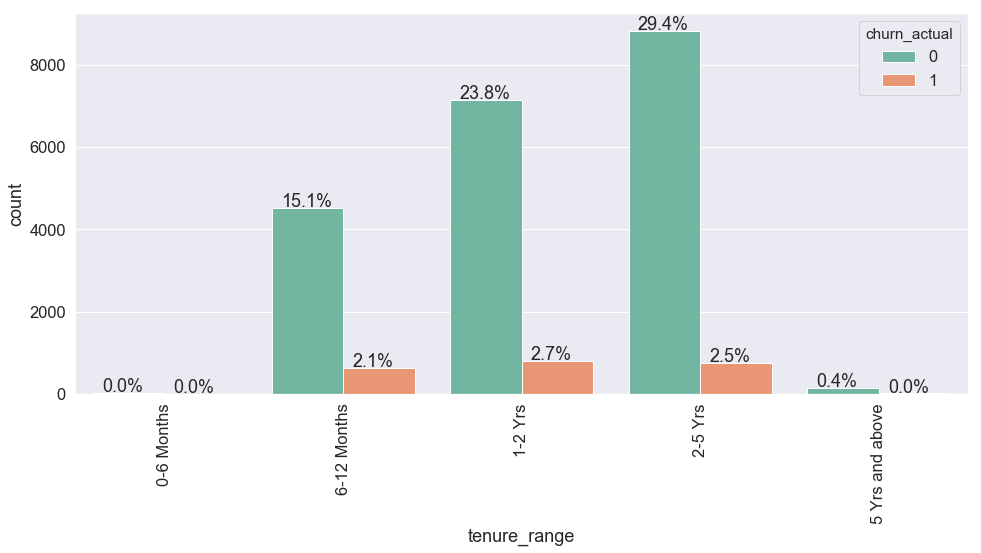

In [36]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(df['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(df.index))
ax = sns.countplot(x="tenure_range", data=df, palette="Set2", hue = "churn_actual");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

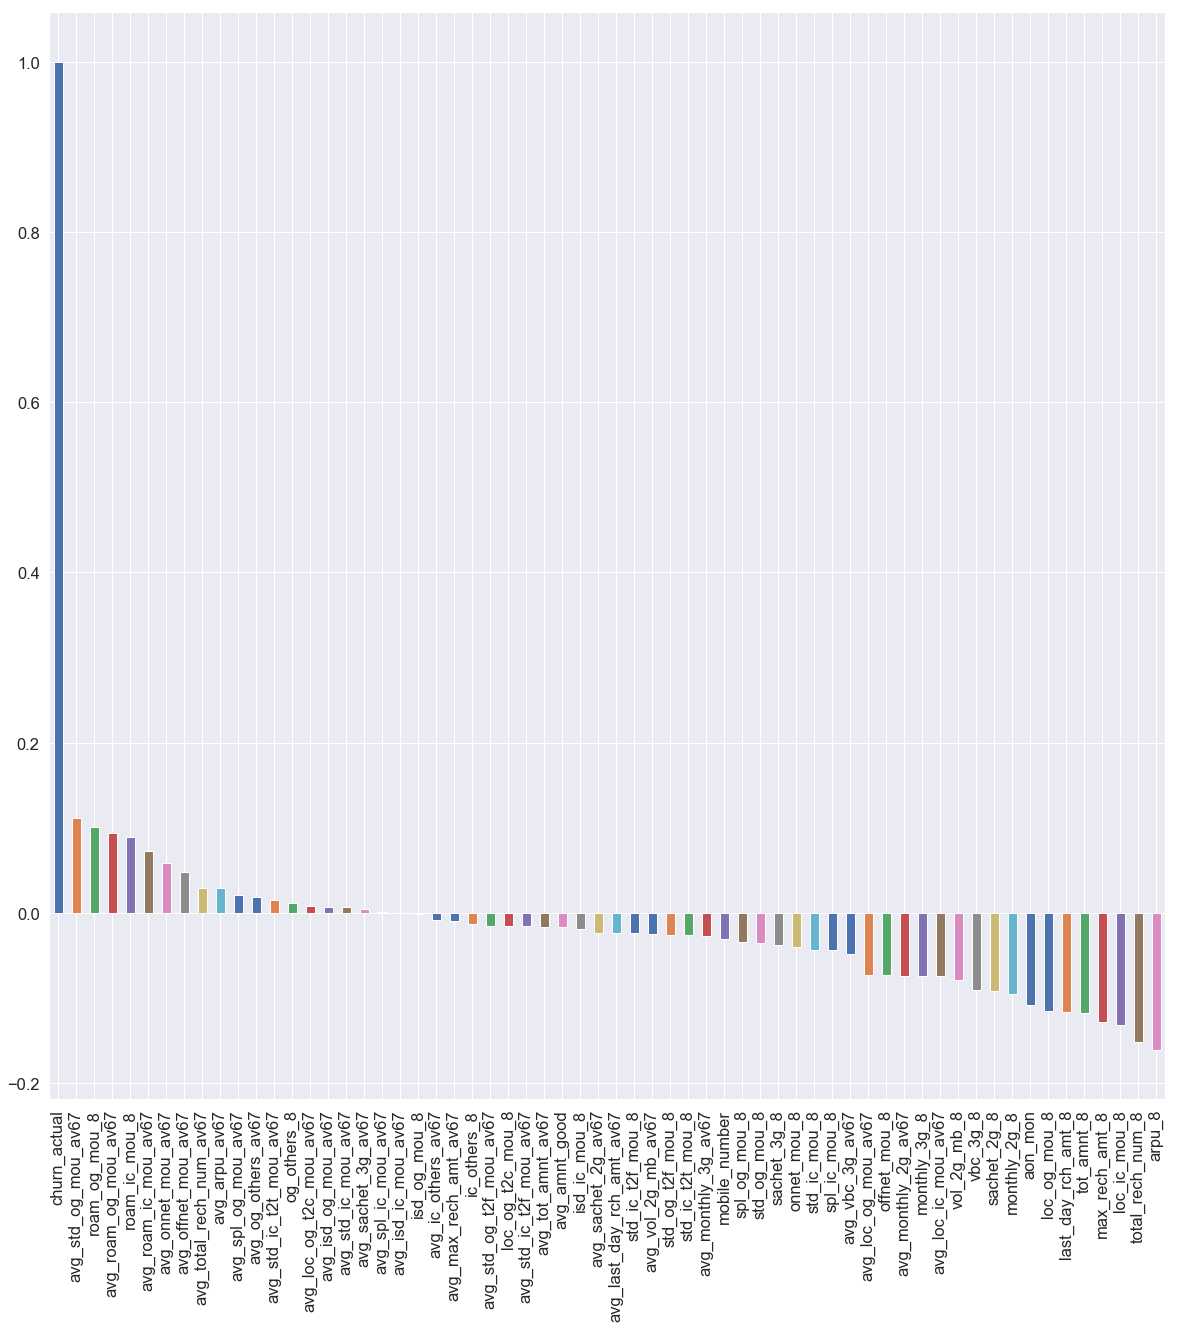

In [37]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,20))
df.corr()['churn_actual'].sort_values(ascending = False).plot(kind='bar')

It is clearly evident that Avg STD Outgoing Calls for Months 6 & 7, Outgoing calls in Roaming seems to be positively correlated with Churn while Average Revenue, Number Of Recharges for 8th Month seems negatively correlated.

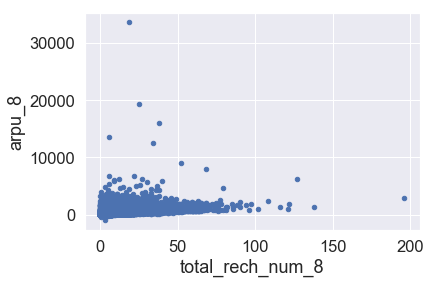

In [38]:
#relation between total recharge in 8th Month Vs Average Revenue in 8th Month
df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

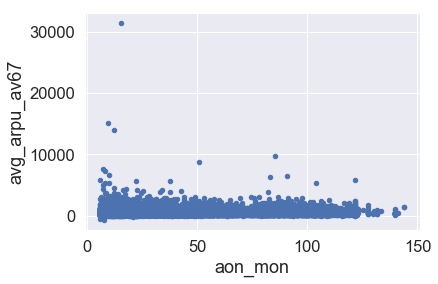

In [39]:
#relation between Tenure And Revenue
df[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',
                                              y='avg_arpu_av67')

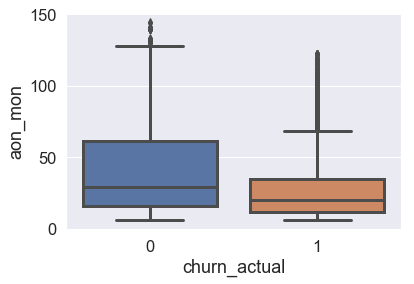

In [40]:
#Churn vs Tenure
sns.boxplot(x = df.churn_actual, y = df.aon_mon)

Hence, the customers who do not churn tend to stay for a longer tenure with the telecom company.

Text(0.5,1,'Distribution of Volume based cost by churn')

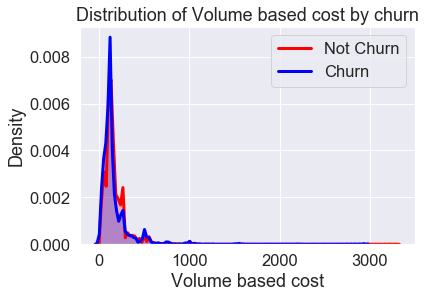

In [41]:
#Churn vs volume based cost
ax = sns.kdeplot(df.avg_max_rech_amt_av67[(df["churn_actual"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.avg_max_rech_amt_av67[(df["churn_actual"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Volume based cost by churn')

Text(0.5,1,'Distribution of Max Recharge Amount by churn')

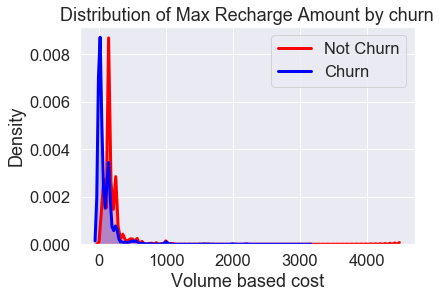

In [42]:
#Churn vs Max Recharge amount
ax = sns.kdeplot(df.max_rech_amt_8[(df["churn_actual"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.max_rech_amt_8[(df["churn_actual"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

As seen, People Who Recharge with less Amount are more likely to Churn

-There is no visible difference in Volume Based Cost & Churn

In [43]:
#Lets Create New DF for Model Building

df = df[:].copy()

#Dropping tenure_range since we have AON MONTH already and columns are highly coorelated
df.drop('tenure_range', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)

#Since All The Values are realted to Price/ Cost/ Amount, Filling NaN with 0

df.fillna(0, inplace=True)

df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,...,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_tot_amnt_av67,aon_mon
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600,559.0,32.266667
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,...,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060,1185.0,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,...,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405,696.0,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,...,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000,640.0,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,...,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930,583.0,20.133333


## Model Building
Let's start by splitting our data into a training set and a test set.

In [44]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['churn_actual'], axis=1)

# Putting response variable to y
y = df['churn_actual']

y.head()
df.drop('churn_actual', axis=1, inplace=True)

### Feature Standardisation

In [45]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Splitting Data into Training and Test Sets

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=1)

### Running First Training Model

In [47]:
import statsmodels.api as sm

In [48]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_actual   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20940
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 17 Feb 2019   Deviance:                          nan
Time:                        22:17:42   Pearson chi2:                 7.94e+12
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6224      0.298    -15.486      0.000      -5.207      -4.037
x1            -0.2328      0.125     -1.859      0.063      -0.478       0.013
x2            -2.1652      2.220     -0.975      0.329      -6.516       2.186
x3            -2.3249      2.330     -0.998      0.318      -6.892       2.242
x4             0.0088      0.029      0.303      0.762      -0.048       0.066
x5             0.5726      0.509      1.124      0.261      -0.426       1.571
x6             0.0341      0.059      0.582      0.561      -0.081       0.149
x7             1.1022      1.769      0.623      0.533      -2.366       4.570
x8            -0.1333      0.111     -1.199      0.230      -0.351       0.085
x9             2.6352      2.952      0.893      0.372      -3.150       8.420
x10            0.3954      0.225      1.756      0.079      -0.046       0.837
x11           -0.0427      0.105     -0.405      0.686      -0.249       0.164
x12          -14.8031     16.553     -0.894      0.371     -47.247      17.641
x13           -2.3152      0.172    -13.426      0.000      -2.653      -1.977
x14           -0.2530      0.150     -1.684      0.092      -0.547       0.041
x15           -0.3584      0.188     -1.903      0.057      -0.728       0.011
x16           -0.3685      0.132     -2.788      0.005      -0.628      -0.109
x17           -0.3996      0.065     -6.111      0.000      -0.528      -0.271
x18           -0.0705      0.066     -1.064      0.287      -0.200       0.059
x19           -0.0143      0.127     -0.112      0.911      -0.263       0.235
x20           -0.6044      0.078     -7.778      0.000      -0.757      -0.452
x21           -0.0271      0.056     -0.482      0.630      -0.137       0.083
x22           -0.5368      0.066     -8.169      0.000      -0.666      -0.408
x23           -0.4052      0.094     -4.297      0.000      -0.590      -0.220
x24           -0.4776      0.080     -5.981      0.000      -0.634      -0.321
x25           -0.7195      0.101     -7.091      0.000      -0.918      -0.521
x26           -0.4068      0.086     -4.708      0.000      -0.576      -0.237
x27           -0.2673      0.096     -2.784      0.005      -0.456      -0.079
x28           -0.3009      0.081     -3.718      0.000      -0.460      -0.142
x29            0.1712      0.195      0.879      0.380      -0.211       0.553
x30           -0.0478      0.039     -1.226      0.220      -0.124       0.029
x31            0.4535      0.084      5.401      0.000       0.289       0.618
x32            1.5649      2.059      0.760      0.447      -2.471       5.601
x33            1.6758      2.147      0.780      0.435      -2.533       5.884
x34            0.1121      0.035      3.189      0.001       0.043       0.181
x35           -0.3060      0.439     -0.697      0.486      -1.166       0.554
x36           -0.0698      0.040     -1.733      0.083      -0.149       0.009
x3

### Using SVM(Support Vector Machine) for Regression

In [49]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logReg = LogisticRegression()
logReg.svm = SVC(kernel='linear') 
logReg.svm.fit(X_train,y_train)
prediction = logReg.svm.predict(X_test)
metrics.accuracy_score(y_test, prediction)

0.9190089990001111

The accuracy obtained through SVM is about 0.92

### Using RFE(Recursive Feature Elimination) to select and reduce features by recursively considering smaller and smaller sets of features 

In [50]:
# Checking for any imbalance in y_test and y_train Data
imbalance_y_train = (y_train != 0).sum()/(y_train == 0).sum()
imbalance_y_test = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", imbalance_y_train)
print("Imbalance in Test Data : ", imbalance_y_test)

Imbalance in Train Data :  0.08875985068436333
Imbalance in Test Data :  0.08812862669245648


In [51]:
# To overcome the imbalance, we are balancing the DataSet
from imblearn.over_sampling import SMOTE

sm_regular = SMOTE(kind = "regular")
X_tr_bal,y_tr_bal = sm_regular.fit_sample(X_train,y_train)

In [52]:
# Calculating Imbalance in Train Data after SMOTE
imbalance = (y_tr_bal != 0).sum()/(y_tr_bal == 0).sum()
print("Imbalance in Train Data : ",imbalance)

Imbalance in Train Data :  1.0


In [53]:
# Reducing the features using RFE
from sklearn.feature_selection import RFE
logReg = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(logReg, 15)   
rfe = rfe.fit(X_tr_bal, y_tr_bal)

rfe_features = list(df.columns[rfe.support_])
print("Features selected by RFE ", rfe_features)

X_rfe = pd.DataFrame(data=X_tr_bal).iloc[:, rfe.support_]
y_rfe = y_tr_bal

Features selected by RFE  ['loc_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'avg_arpu_av67', 'avg_offnet_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67']


### Logistic Regression

In [54]:
# Let's run the model using the selected variables
logReg = LogisticRegression(random_state=1)
logReg.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import confusion_matrix
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = logReg.predict(X_test_rfe)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6561 1711]
 [ 139  590]]


In [56]:
print('Accuracy obtained by Logistic Regression Model on test set is ',logReg.score(X_test_rfe, y_test))

Accuracy obtained by Logistic Regression Model on test set is  0.7944672814131764


### Test Train Split - Re-Splitting

In [57]:
# Resampling train and test data to counter the imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
logReg = LogisticRegression()

logReg.svm = SVC(kernel='linear') 
logReg.svm.fit(X_train,y_train)
prediction = logReg.svm.predict(X_test)
metrics.accuracy_score(y_test, prediction)

0.9170138310281619

In [58]:
# Reducing the features using RFE
from sklearn.feature_selection import RFE
logReg = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(logReg, 15)   
rfe = rfe.fit(X_tr_bal, y_tr_bal)

rfe_features = list(df.columns[rfe.support_])
print("Features selected by RFE ", rfe_features)

X_rfe = pd.DataFrame(data=X_tr_bal).iloc[:, rfe.support_]
y_rfe = y_tr_bal

Features selected by RFE  ['loc_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'avg_arpu_av67', 'avg_offnet_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67']


In [59]:
# Let's run the model using the selected variables
logReg = LogisticRegression(random_state=1)
logReg.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Model Evaluation

In [60]:
from sklearn.metrics import confusion_matrix
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = logReg.predict(X_test_rfe)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4410 1093]
 [  80  418]]


##### Drawback with the current model --> Predicts churn as high false positives

In [61]:
# To get the weights of all the variables
weights = pd.Series(logReg.coef_[0],
                 index=rfe_features)
weights.sort_values(ascending = False)

avg_loc_ic_mou_av67    0.699540
avg_arpu_av67          0.633320
avg_offnet_mou_av67    0.076612
avg_std_og_mou_av67   -0.143185
vol_2g_mb_8           -0.358547
std_ic_mou_8          -0.438194
spl_ic_mou_8          -0.450144
last_day_rch_amt_8    -0.540681
monthly_3g_8          -0.553971
total_rech_num_8      -0.592994
sachet_2g_8           -0.635412
monthly_2g_8          -0.707535
loc_og_mou_8          -1.136958
loc_ic_mou_8          -2.672641
og_others_8           -2.781675
dtype: float64

### Performing PCA[Principal Component Analysis] on Data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#Applying Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(38576, 60)
(38576,)


In [63]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [64]:
#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [65]:
#### Let's plot the principal components and try to make sense of them
# We'll plot original features on the first 2 principal components as axes
pca.components_

array([[ 3.01033042e-01,  1.80562614e-01,  2.44014545e-01, ...,
         2.59564567e-02,  1.05285807e-01,  5.41582288e-02],
       [-1.77745879e-02, -1.62737194e-01, -1.19961811e-01, ...,
         1.26920395e-01,  1.82498541e-02,  8.41128985e-02],
       [-1.46709163e-01,  1.17466889e-02, -3.15643995e-02, ...,
        -1.98127054e-01, -1.96757401e-01, -1.07792793e-01],
       ...,
       [-8.29356002e-04, -3.17055507e-01, -3.33148090e-01, ...,
         4.05924573e-04, -2.68127342e-04,  3.12382798e-04],
       [-1.95423270e-03, -3.44326136e-01, -3.61670853e-01, ...,
        -3.28144800e-04,  9.52643148e-05,  4.90122472e-05],
       [-0.00000000e+00,  5.59670740e-14,  5.80886038e-14, ...,
        -2.39116183e-16,  7.07106781e-01, -4.82045549e-16]])

In [66]:
pca.explained_variance_ratio_

array([1.04908690e-01, 8.26292767e-02, 7.83190584e-02, 6.33049662e-02,
       4.30485801e-02, 4.22694416e-02, 3.38545561e-02, 3.10498157e-02,
       3.08933138e-02, 2.82277357e-02, 2.77034913e-02, 2.66138912e-02,
       2.55552719e-02, 2.41474595e-02, 2.26961090e-02, 2.07809778e-02,
       2.02432093e-02, 1.80613607e-02, 1.61989385e-02, 1.45901084e-02,
       1.43698103e-02, 1.41925283e-02, 1.35900973e-02, 1.31867286e-02,
       1.29305154e-02, 1.25644596e-02, 1.14978375e-02, 1.07608472e-02,
       1.04261346e-02, 9.88882652e-03, 9.29298643e-03, 8.32474256e-03,
       7.63539204e-03, 7.56656882e-03, 6.84079411e-03, 6.54892995e-03,
       5.85349658e-03, 5.80344978e-03, 5.59387245e-03, 5.22499249e-03,
       4.67906938e-03, 4.58860831e-03, 4.37552106e-03, 4.14010504e-03,
       3.95596201e-03, 3.77399811e-03, 3.56841433e-03, 3.52071289e-03,
       3.18431659e-03, 3.02507607e-03, 2.79324566e-03, 2.65956182e-03,
       2.30847026e-03, 2.00044647e-03, 1.83686172e-03, 1.43544715e-03,
      

In [67]:
colnames = list(df.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.301033,-0.017775,-0.146709,arpu_8
1,0.180563,-0.162737,0.011747,onnet_mou_8
2,0.244015,-0.119962,-0.031564,offnet_mou_8
3,0.226401,0.310179,0.273526,roam_ic_mou_8
4,0.211881,0.207980,0.228606,roam_og_mou_8
5,0.045429,-0.051395,-0.016860,loc_og_t2c_mou_8
6,0.151573,-0.039679,-0.155911,loc_og_mou_8
7,0.041230,0.025939,-0.047737,std_og_t2f_mou_8
8,0.198764,-0.227714,0.041014,std_og_mou_8
9,0.036215,0.008367,-0.037956,isd_og_mou_8


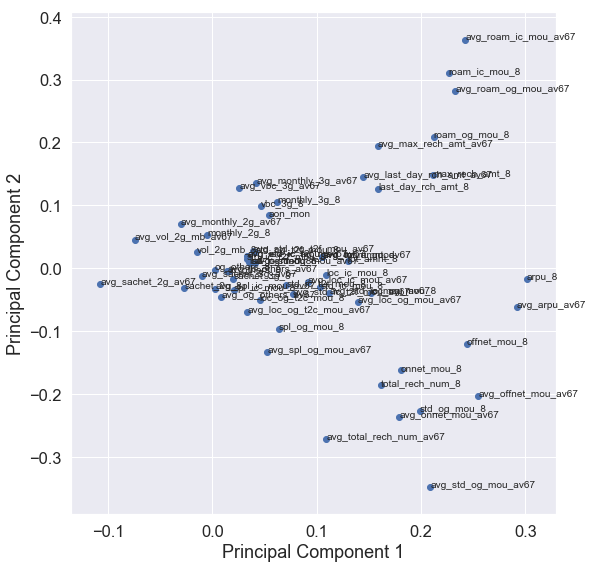

In [68]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca.PC1, df_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pca.Feature):
    plt.annotate(txt, (df_pca.PC1[i],df_pca.PC2[i]))
plt.tight_layout()
plt.show()

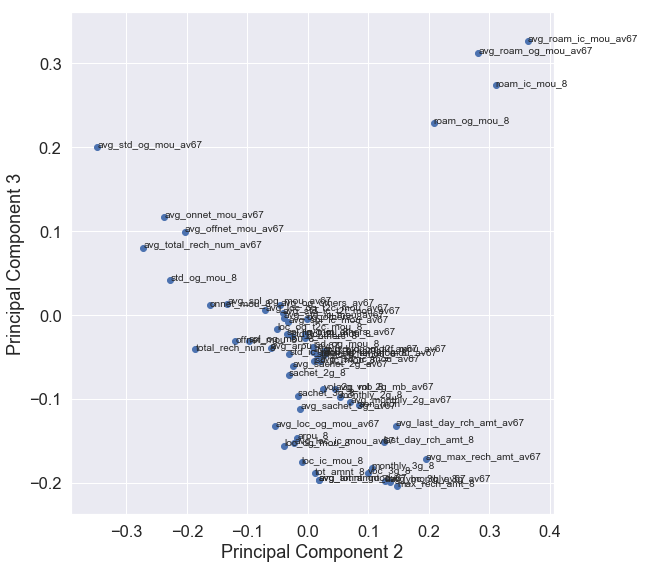

In [69]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca.PC2, df_pca.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(df_pca.Feature):
    plt.annotate(txt, (df_pca.PC2[i],df_pca.PC3[i]))
plt.tight_layout()
plt.show()

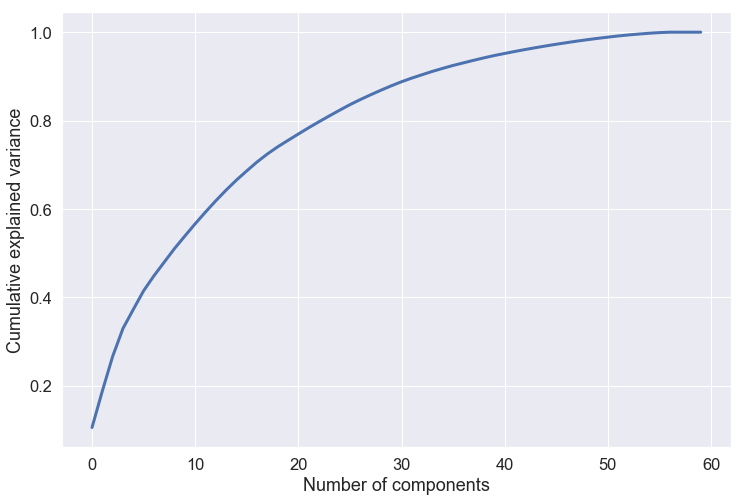

In [70]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [71]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38576, 60)
(9001, 60)


#### Applying a logistic regression on our Principal Components

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca = LogisticRegression(C=1e9)
learner_pca.fit(X_tr_pca, y_tr)

# Predicted probabilities
y_pred = learner_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

[[6740 1532]
 [ 128  601]]
Logistic Regression accuracy with PCA:  0.8155760471058772


Let us choose 32 components for our modeling

In [74]:
pca_32 = PCA(n_components=32)

df_tr_pca_32 = pca_32.fit_transform(X_tr)
print(df_tr_pca_32.shape)

df_test_pca_32 = pca_32.transform(X_test)
print(df_test_pca_32.shape)

(38576, 32)
(9001, 32)


In [75]:
# Running the model using the selected variables from PCA
learner_pca1 = LogisticRegression(C=1e9)
learner_pca1.fit(df_tr_pca_32, y_tr)

# Predicted probabilities
y_pred32 = learner_pca1.predict(df_test_pca_32)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred32)

In [76]:
print(confusion_matrix(y_test,y_pred32))
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred32))

[[6705 1567]
 [ 145  584]]
Logistic Regression accuracy with PCA:  0.8097989112320854


As seen, the model has 80% accuracy with 32 features

Building models to further reduce the feautres

### Decision Trees

In [77]:
# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

print(X_tr.shape)
print(y_tr.shape)

(38576, 60)
(38576,)


Using LASSO to reduce the number of features

In [78]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
print(X_lasso.shape)
print(pos)

(38576, 29)
[ 0  2  3  4  6  7  8 10 12 15 16 19 21 22 23 24 25 26 27 30 33 35 38 42
 49 50 52 53 59]


In [79]:
#feature vector for decision tree
lasso_features = list(df.columns[pos])
print("Features for LASSO model buidling: ", lasso_features)

Features for LASSO model buidling:  ['arpu_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8', 'avg_arpu_av67', 'avg_roam_ic_mou_av67', 'avg_loc_og_t2c_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_total_rech_num_av67', 'avg_max_rech_amt_av67', 'avg_vol_2g_mb_av67', 'avg_monthly_2g_av67', 'aon_mon']


#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [80]:
# Importing decision tree classifier from sklearn library
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Running Decision Tree Classifier with default parameters
dt1 = DecisionTreeClassifier(max_depth=5)

In [81]:
#fit
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [83]:
# Let's check the report of our default model

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_predictions = dt1.predict(X_test)

# Classification report
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8272
           1       0.37      0.77      0.50       729

   micro avg       0.87      0.87      0.87      9001
   macro avg       0.67      0.83      0.71      9001
weighted avg       0.93      0.87      0.89      9001



In [84]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_predictions))

[[7306  966]
 [ 168  561]]


In [85]:
print(accuracy_score(y_test,y_predictions))

0.8740139984446172


### Hyperparameter Tuning

### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [86]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [87]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.155846,0.017955,0.002234,0.000445,1,{'max_depth': 1},0.786418,0.788880,0.782919,0.779233,...,0.784633,0.003301,39,0.784640,0.783992,0.785515,0.786436,0.784849,0.785087,0.000832
1,0.289820,0.009288,0.002090,0.000353,2,{'max_depth': 2},0.806765,0.814671,0.810653,0.813975,...,0.812733,0.003714,38,0.814647,0.812994,0.813675,0.813168,0.811127,0.813122,0.001151
2,0.391607,0.009593,0.002004,0.000093,3,{'max_depth': 3},0.848497,0.858994,0.857698,0.858439,...,0.857165,0.004599,37,0.860337,0.857421,0.858036,0.857948,0.854902,0.857729,0.001734
3,0.546763,0.042344,0.002153,0.000068,4,{'max_depth': 4},0.852385,0.865863,0.862364,0.862588,...,0.861987,0.005105,36,0.866948,0.863772,0.862994,0.863230,0.861091,0.863607,0.001899
4,0.649102,0.060884,0.002167,0.000112,5,{'max_depth': 5},0.870399,0.876879,0.870788,0.869977,...,0.873522,0.003940,35,0.878840,0.878937,0.877479,0.877292,0.873728,0.877255,0.001888


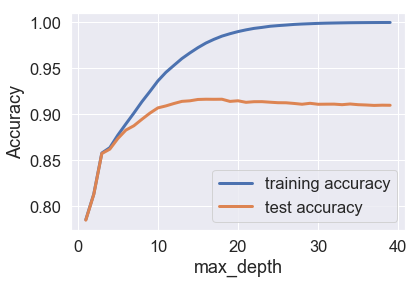

In [88]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

A max_depth of 10 is optimal 

### Tuning min_samples_leaf
The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [89]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model (note we are specifying a min_samples_leaf)
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [90]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.765440,0.086760,0.003984,0.001557,5,{'min_samples_leaf': 5},0.872732,0.912131,0.907983,0.908997,...,0.902815,0.015136,1,0.969864,0.962152,0.962378,0.964422,0.963418,0.964447,0.002827
1,1.446526,0.065555,0.002886,0.000053,25,{'min_samples_leaf': 25},0.869751,0.899300,0.896449,0.896033,...,0.892731,0.011698,2,0.922975,0.916753,0.917596,0.918217,0.914685,0.918045,0.002738
2,1.399064,0.147009,0.002810,0.000154,45,{'min_samples_leaf': 45},0.881156,0.894764,0.889062,0.886700,...,0.889309,0.005177,3,0.911666,0.903046,0.902916,0.903636,0.901043,0.904461,0.003706
3,1.191463,0.072768,0.002664,0.000091,65,{'min_samples_leaf': 65},0.875324,0.885951,0.886210,0.886311,...,0.884903,0.005106,4,0.903338,0.897537,0.896792,0.899326,0.892457,0.897890,0.003538
4,1.206888,0.066701,0.004285,0.003394,85,{'min_samples_leaf': 85},0.870270,0.884266,0.879082,0.885533,...,0.881377,0.006240,5,0.894102,0.893001,0.890408,0.892878,0.886657,0.891409,0.002666


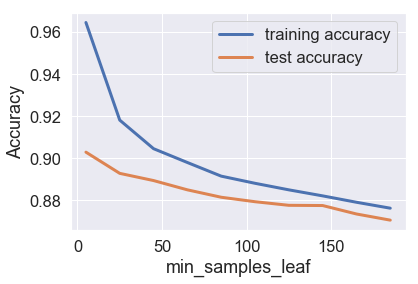

In [91]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As seen from the above plot a min_samples_leaf = 25 looks to be optimal. We can see that the model starts to overfit as we increase the value of min_samples_leaf.

### Tuning min_samples_split

In [92]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [93]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.879040,0.060596,0.003601,0.001090,5,{'min_samples_split': 5},0.877009,0.919129,0.918999,0.913015,...,0.909451,0.016392,1,0.994815,0.992903,0.993033,0.993260,0.993131,0.993429,0.000703
1,1.916556,0.169889,0.008355,0.006918,25,{'min_samples_split': 25},0.869751,0.916019,0.904095,0.905367,...,0.899912,0.015723,2,0.966559,0.959624,0.958684,0.957650,0.957909,0.960085,0.003309
2,1.831346,0.069730,0.004484,0.002955,45,{'min_samples_split': 45},0.864438,0.909409,0.904225,0.900441,...,0.897112,0.016610,3,0.948866,0.942709,0.944621,0.940607,0.940963,0.943553,0.003016
3,1.856340,0.113861,0.005070,0.003056,65,{'min_samples_split': 65},0.863790,0.906169,0.904614,0.896681,...,0.894209,0.015582,4,0.940408,0.932404,0.937848,0.933640,0.930400,0.934940,0.003663
4,2.337814,0.059603,0.005545,0.004532,85,{'min_samples_split': 85},0.868714,0.901244,0.900207,0.893440,...,0.892109,0.012013,5,0.933895,0.924530,0.928321,0.927646,0.920614,0.927001,0.004395


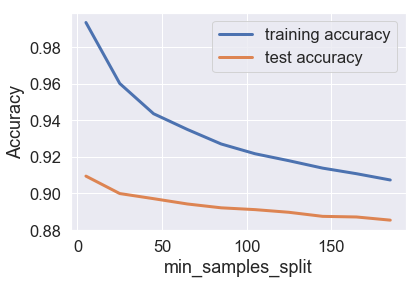

In [94]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As observed from the above plot min_samples_leaf=50 looks optimal

## Grid Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using GridSearchCV.

In [95]:
# Create the parameter grid based on the results of decision tree classifier
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5



# Create a decision tree classifier based model
dtree = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

In [96]:
# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(25, 175, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [97]:
# printing the optimal accuracy score and hyperparameters
print('We can get best accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best accuracy of 0.8941310659477395 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 50}


In [98]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.810232,0.031434,0.002245,0.000034,entropy,5,25,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.863271,...,0.868934,0.005659,20,0.873202,0.871679,0.873169,0.872465,0.870553,0.872213,0.001000
1,0.798713,0.026261,0.003874,0.002175,entropy,5,25,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.863790,...,0.868960,0.005519,19,0.873169,0.871452,0.873169,0.872270,0.870553,0.872123,0.001013
2,0.789935,0.006281,0.003030,0.001148,entropy,5,75,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.861846,...,0.866860,0.005903,21,0.871322,0.869864,0.870188,0.871006,0.869192,0.870314,0.000771
3,0.845872,0.056253,0.003480,0.002651,entropy,5,75,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.861846,...,0.866860,0.005903,21,0.871322,0.869864,0.870188,0.871006,0.869192,0.870314,0.000771
4,0.775289,0.011334,0.002198,0.000157,entropy,5,125,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.860161,...,0.866342,0.006434,23,0.870156,0.870123,0.870026,0.870456,0.868220,0.869796,0.000801
5,0.809996,0.016720,0.002146,0.000088,entropy,5,125,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.860161,...,0.866342,0.006434,23,0.870156,0.870123,0.870026,0.870456,0.868220,0.869796,0.000801
6,1.352137,0.019678,0.002798,0.000504,entropy,10,25,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.867678,...,0.891694,0.012171,2,0.915749,0.912897,0.910337,0.915948,0.908042,0.912595,0.003069
7,1.410764,0.128909,0.003522,0.001952,entropy,10,25,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.867030,...,0.888584,0.011256,4,0.910564,0.906124,0.904828,0.908625,0.901918,0.906412,0.002997
8,1.302255,0.105735,0.003059,0.000783,entropy,10,75,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.871695,...,0.879951,0.005583,7,0.895269,0.893908,0.892353,0.895665,0.892781,0.893995,0.001311
9,1.230607,0.033049,0.002690,0.000325,entropy,10,75,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.871695,...,0.879951,0.005583,7,0.895269,0.893908,0.892353,0.895665,0.892781,0.893995,0.001311


In [99]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [100]:
# Accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8742361959782247


Decision Trees Analysis: Accuracy is around 0.88. Confusion matix shows lot of false positives still exist. 31 Features were selected for Model Building

#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [101]:
# Importing random forest classifier from sklearn library
import sklearn
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [102]:
# fit
rfc.fit(X_lasso,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [103]:
# Making predictions
predictions = rfc.predict(X_test)

In [104]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [105]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8272
           1       0.54      0.65      0.59       729

   micro avg       0.93      0.93      0.93      9001
   macro avg       0.75      0.80      0.78      9001
weighted avg       0.93      0.93      0.93      9001



In [106]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7871  401]
 [ 256  473]]


In [107]:
print(accuracy_score(y_test,predictions))

0.9270081102099766


### Hyperparameter Tuning

### Tuning max_depth
Let's find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [108]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [109]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.579321,0.043373,0.012655,0.001598,2,{'max_depth': 2},0.819984,0.838258,0.823224,0.795307,...,0.823595,0.016359,4,0.827803,0.836034,0.822748,0.803610,0.840451,0.826129,0.012842
1,1.368365,0.162977,0.027482,0.004541,7,{'max_depth': 7},0.884137,0.903966,0.894246,0.892663,...,0.895790,0.007500,3,0.908134,0.905898,0.904634,0.906066,0.903052,0.905557,0.001682
2,2.056766,0.171019,0.033591,0.003113,12,{'max_depth': 12},0.918092,0.934552,0.934292,0.931683,...,0.931097,0.006707,2,0.961860,0.956578,0.959106,0.960728,0.958363,0.959327,0.001839
3,1.838024,0.025626,0.022838,0.003706,17,{'max_depth': 17},0.928331,0.952177,0.944401,0.946591,...,0.945018,0.009012,1,0.986617,0.985612,0.983279,0.985354,0.985646,0.985302,0.001099


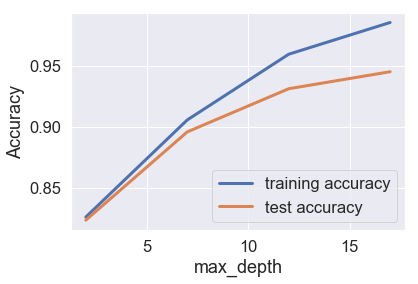

In [110]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. 
The ensemble tries to overfit as we increase the max_depth.
Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

### Tuning n_estimators

In [111]:
## GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


## specify number of folds for k-fold CV
n_folds = 5

## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [112]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.134766,0.672563,0.138511,0.008590,100,{'n_estimators': 100},0.867937,0.883489,0.878694,0.876329,...,0.878214,0.005972,2,0.880849,0.879974,0.881854,0.879787,0.880111,0.880515,0.000760
1,35.344449,1.593024,0.617111,0.016223,500,{'n_estimators': 500},0.869233,0.884266,0.876361,0.874903,...,0.877774,0.005752,4,0.884316,0.879585,0.880557,0.880597,0.879010,0.880813,0.001852
2,61.425714,0.731910,1.131151,0.017398,900,{'n_estimators': 900},0.870529,0.884914,0.875065,0.876199,...,0.878292,0.005669,1,0.884802,0.879164,0.880817,0.879593,0.879658,0.880807,0.002072
3,89.261994,1.073415,1.704097,0.098901,1300,{'n_estimators': 1300},0.869751,0.884655,0.876620,0.875292,...,0.878085,0.005636,3,0.883312,0.879715,0.880331,0.880760,0.879075,0.880638,0.001453


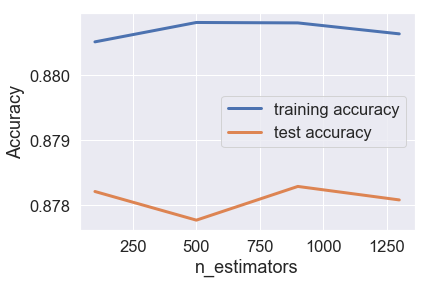

In [113]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [114]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [115]:
# scores of GridSearch CV
scores = rf.cv_results_

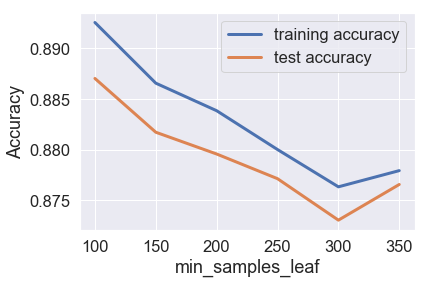

In [116]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [117]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [118]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.012704,0.242048,0.028417,0.005159,200,{'min_samples_split': 200},0.885692,0.909927,0.900855,0.898367,...,0.900456,0.008497,1,0.916591,0.910953,0.909754,0.909695,0.909565,0.911311,0.002687
1,1.846417,0.090094,0.023273,0.006887,250,{'min_samples_split': 250},0.884266,0.899689,0.896579,0.895126,...,0.896412,0.007208,2,0.917984,0.904601,0.903435,0.906811,0.904770,0.907520,0.005344
2,2.102776,0.149622,0.030761,0.006563,300,{'min_samples_split': 300},0.886081,0.902411,0.891524,0.891496,...,0.895298,0.007183,3,0.912054,0.904634,0.901847,0.902469,0.903441,0.904889,0.003704
3,2.190077,0.020741,0.028033,0.009050,350,{'min_samples_split': 350},0.878823,0.897875,0.896579,0.890459,...,0.892783,0.007686,4,0.905055,0.896922,0.901264,0.899261,0.898257,0.900152,0.002832
4,1.715550,0.165701,0.018639,0.003044,400,{'min_samples_split': 400},0.879342,0.895153,0.891913,0.888125,...,0.891228,0.007410,5,0.906578,0.894200,0.896273,0.898289,0.897771,0.898622,0.004224


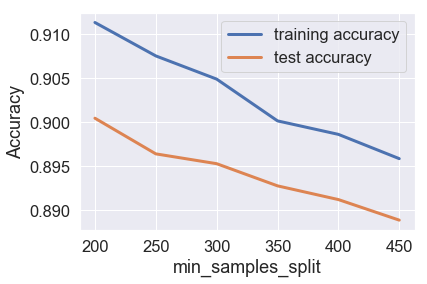

In [119]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using GridSearchCV.

In [120]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

**Fitting the final model with the best parameters obtained from grid search.*

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
X = df
# Scaling all the variables to a range of 0 to 1
#from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'bar')

## Summary of the Analysis:
From the EDA, it is evident that 
1. Very less % (8%) of High Value Customers are churning which is a healthy indicator 
2. Large number of customers fall under less than 5 year tenure 
3. People with less than 4 years are more likely to churn


## 2.Analysis from Model Building and predicting the Strong Indicators: 
1. Std Outgoing calls and Revenue Per Customer are strong indicators of Churn 
2. Max Recharge Amount is a good Churn Indicator 
3. Local Incoming and Outgoing Calls during Action Phase (8th Month) is a strong indicator of Churn, as these parameters reduce in the 8th month before the Churn Phase 
4. Average Revenue generated reduces in Action Phase (8th Month)and is a strong indicator of Churn Behaviour of Volume Based Cost is not a strong indicator of Churn



## 3.Best Model to Predict Churn: Random Forest is the best method, followed by SVM